In [132]:
%pylab inline

import matplotlib.pyplot as plt
import pandas as pd
import random
import os
import matplotlib as mpl
import numpy as np
mpl.rcParams['pdf.fonttype'] = 42
import scipy.stats
import sklearn.linear_model
import sklearn.ensemble

DATAPATH = "../data"

# Zscores file: chrom	start	end	ml_mu	ml_mu_se	pred_mu	predmu_se	zscore
zscores = pd.read_csv(os.path.join(DATAPATH, "autosomal_perlocus_zscores.bed"), sep="\t")
loci = pd.read_csv(os.path.join(DATAPATH, "loci_for_figure.bed"), names=["chrom","start","end","marker"], sep="\t")
loci = pd.merge(loci, zscores, on=["chrom","start","end"])
loci["diff"] = loci["ml_mu"]-loci["pred_mu"]
loci["length"] = loci["end"]-loci["start"]+1

loci = loci[loci["marker"] != "Gilbert"]

Populating the interactive namespace from numpy and matplotlib


`%matplotlib` prevents importing * from pylab and numpy


In [133]:
def GetColor(x):
    if x["marker"] == "CODIS": return "black"
    else: return "red"

def GetMarker(x):
    if x["marker"] == "CODIS": return "CODIS"
    else: return "DISEASE:%s"%x["marker"]
        
loci = loci.sort("marker")
loci["color"] = loci.apply(lambda x: GetColor(x), 1)
loci["marker"] = loci.apply(lambda x: GetMarker(x), 1)
loci = loci.sort("marker")
loci = loci.sort("diff")

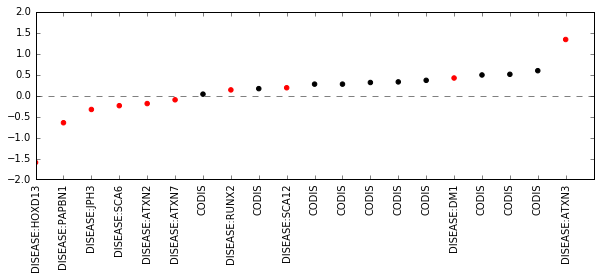

In [134]:
fig = plt.figure()
fig.set_size_inches((10, 3))
ax = fig.add_subplot(111)
ax.scatter(range(loci.shape[0]), loci["diff"], color=list(loci.color));
ax.set_xlim(left=0, right=loci.shape[0])
ax.set_xticks(range(loci.shape[0]))
ax.set_xticklabels(loci.marker, rotation=90);
ax.axhline(0, linestyle="dashed", color="gray")

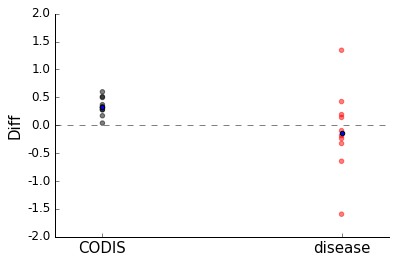

In [135]:
loci["xcoord"] = loci["color"].apply(lambda x: [0,1][x=="red"])

fig = plt.figure()
ax = fig.add_subplot(111)
ax.scatter(loci["xcoord"], loci["diff"], color=list(loci.color), alpha=0.5);
ax.scatter([0,1],[np.median(loci[loci["color"]=="black"]["diff"]),
                 np.median(loci[loci["color"]=="red"]["diff"])])
ax.set_xticks([0,1])
ax.set_xticklabels(["CODIS","disease"], size=15);
ax.set_ylabel("Diff", size=15)
ax.set_yticklabels(ax.get_yticks(), size=12)
ax.axhline(0, linestyle="dashed", color="gray")
ax.get_xaxis().tick_bottom();
ax.get_yaxis().tick_left();
ax.spines["top"].set_visible(False);
ax.spines["right"].set_visible(False);

In [136]:
loci

,chrom,start,end,marker,ml_mu,ml_mu_se,pred_mu,predmu_se,zscore,diff,length,color,xcoord
20,2,176957786,176957827,DISEASE:HOXD13,-7.674249,0.000000,-6.079608,0.025171,-89.594291,-1.594640,42,red,1
17,17,68735170,68735186,DISEASE:PAPBN1,-6.725224,3.275015,-6.079608,0.025171,-0.278781,-0.645615,17,red,1
14,16,87637889,87637935,DISEASE:JPH3,-3.795438,0.245596,-3.467023,0.033798,-1.873454,-0.328415,47,red,1
15,19,13318673,13318712,DISEASE:SCA6,-3.651243,0.263161,-3.413440,0.036676,-1.265710,-0.237804,40,red,1
18,12,112036754,112036823,DISEASE:ATXN2,-3.614464,1.058926,-3.427068,0.036040,-0.250126,-0.187396,70,red,1
16,3,63898361,63898392,DISEASE:ATXN7,-4.083734,0.349867,-3.986369,0.043879,-0.390507,-0.097365,32,red,1
4,7,83789542,83789593,CODIS,-3.077558,0.396328,-3.115553,0.034008,0.135082,0.037995,52,black,0
12,6,45390487,45390531,DISEASE:RUNX2,-5.940301,1.591492,-6.079608,0.025171,0.123775,0.139308,45,red,1
9,19,30417141,30417192,CODIS,-2.996449,0.414179,-3.165914,0.033968,0.576702,0.169465,52,black,0
10,5,146258291,146258322,DISEASE:SCA12,-3.796006,0.258814,-3.986369,0.043879,1.025550,0.190363,32,red,1
